# Extract, Loading & Cleaning the Data
"All data is logically cleaned, preprocessed and transformed into the correct format for analysis"

In [47]:
#import libraries necessary for data manipulation & visualization
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('../Resources/AI_Impact_On_Jobs_2030.csv')

In [49]:
df.head(5) #checking first 5 records to see if data loaded successfully.

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


# Creating a copy of the dataframe to use (application of Best Practice)

In [50]:
ai_df = df.copy() #Best Practice

In [51]:
ai_df.head() #checking again using new dataframe copy

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


# Extensive EDA work

In [52]:
ai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [53]:
ai_df.shape

(3000, 18)

In [54]:
ai_df['Automation_Probability_2030'].value_counts()

Automation_Probability_2030
0.57    55
0.56    48
0.48    48
0.40    47
0.43    46
        ..
0.06    22
0.18    21
0.23    19
0.05    18
0.95    14
Name: count, Length: 91, dtype: int64

In [55]:
ai_df['Risk_Category'].value_counts()

Risk_Category
Medium    1521
High       740
Low        739
Name: count, dtype: int64

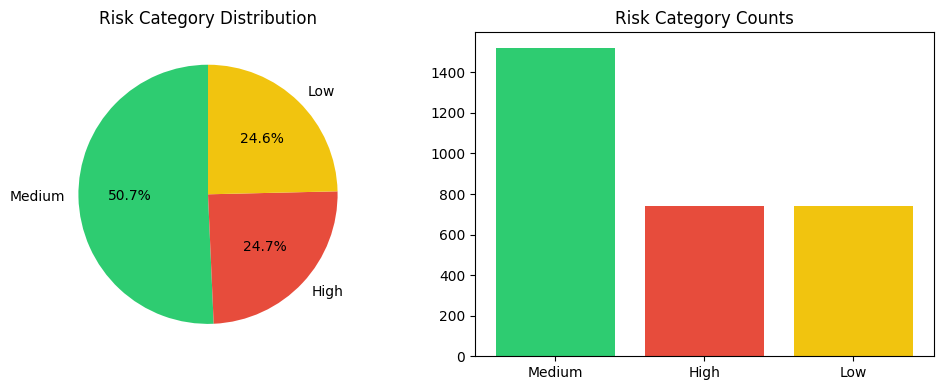

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

risk_counts = ai_df['Risk_Category'].value_counts()

colors = ['#2ecc71', '#e74c3c', '#f1c40f']

axes[0].pie(risk_counts, 
            labels=['Medium', 'High', 'Low'], 
            autopct='%1.1f%%', 
            colors=colors, 
            startangle=90)
axes[0].set_title('Risk Category Distribution')

axes[1].bar(risk_counts.index, risk_counts.values, color=colors)
axes[1].set_title('Risk Category Counts')

plt.tight_layout()
plt.show()

In [57]:
numerical_cols = ai_df.select_dtypes("number")
numerical_cols

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,45795,28,0.18,1.28,0.85,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,133355,20,0.62,1.11,0.05,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,146216,2,0.86,1.18,0.81,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,136530,13,0.39,0.68,0.60,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,70397,22,0.52,1.46,0.64,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,111319,6,0.24,1.18,0.20,0.73,0.37,0.99,0.07,0.08,0.92,0.65,0.33,0.76,0.45
2996,44363,29,0.65,0.74,0.35,0.23,0.48,0.05,0.88,0.56,0.29,0.69,0.80,0.61,0.20
2997,61325,23,0.64,0.94,0.39,0.28,0.62,0.73,0.21,0.96,0.01,0.70,0.29,0.48,0.57
2998,110296,7,0.95,1.23,0.46,0.21,0.18,0.14,0.22,0.55,0.68,0.31,0.55,0.34,0.70


In [58]:
numerical_cols.columns

Index(['Average_Salary', 'Years_Experience', 'AI_Exposure_Index',
       'Tech_Growth_Factor', 'Automation_Probability_2030', 'Skill_1',
       'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7',
       'Skill_8', 'Skill_9', 'Skill_10'],
      dtype='object')

In [59]:
ai_df[numerical_cols.columns].describe()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


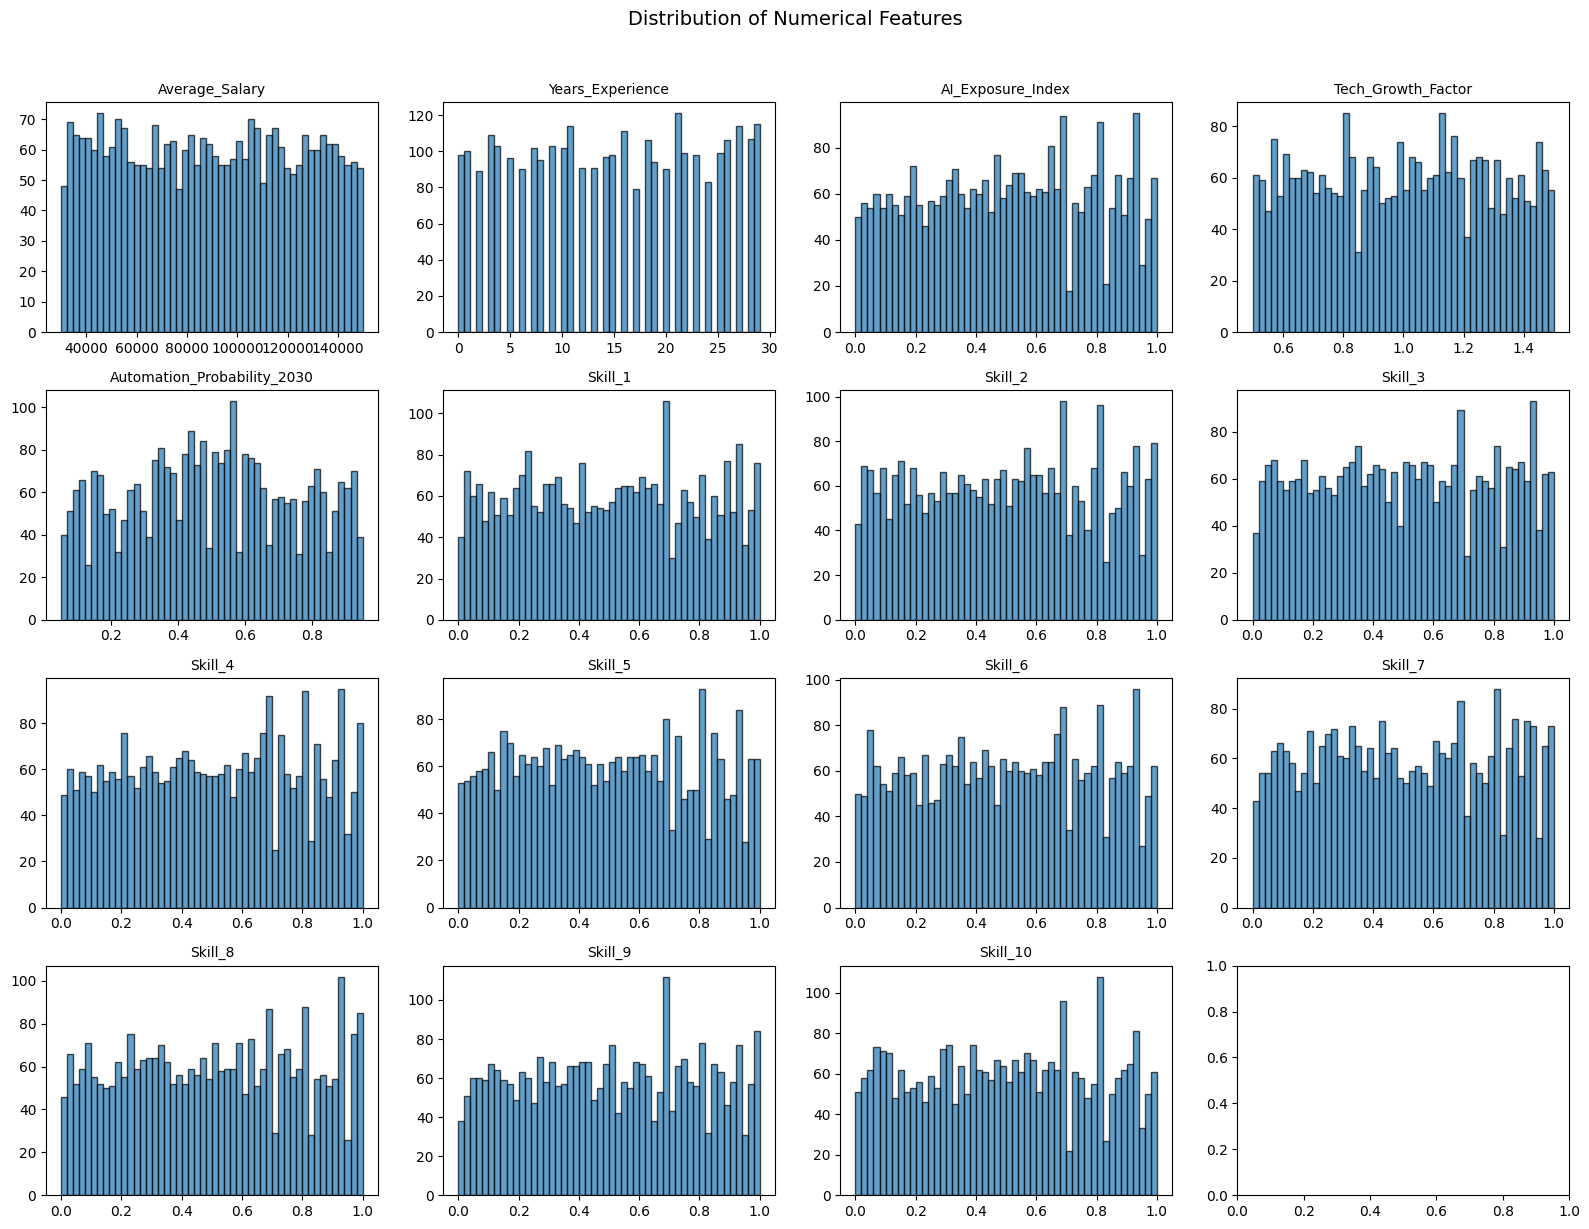

In [60]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))

axes = axes.ravel()

for idx, col in enumerate(numerical_cols.columns[:16]):
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [61]:
categorical_cols = ai_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Job_Title', 'Education_Level', 'Risk_Category']

In [62]:
ai_df.groupby('Risk_Category')[numerical_cols.columns].mean()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
Risk_Category,,,,,,,,,,,,,,,
High,87359.441892,14.497297,0.509851,0.999811,0.829500,0.514541,0.507581,0.496054,0.501095,0.486838,0.492446,0.499405,0.500135,0.503824,0.500959
Low,89166.776725,14.723951,0.496049,0.981231,0.176604,0.488742,0.492625,0.509337,0.506360,0.502760,0.482882,0.509959,0.512463,0.503085,0.491448
Medium,90451.414859,14.742932,0.499658,1.000026,0.499783,0.492426,0.494438,0.496029,0.503609,0.485871,0.511611,0.493794,0.499487,0.499467,0.491118


In [63]:
ai_df.groupby('Education_Level')[numerical_cols.columns].mean()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
Education_Level,,,,,,,,,,,,,,,
Bachelor's,88815.495425,14.530719,0.496510,1.009739,0.500353,0.494327,0.495203,0.501882,0.499725,0.484941,0.494170,0.489752,0.489935,0.497333,0.495817
High School,88389.293367,14.204082,0.497551,0.991811,0.509056,0.489605,0.510166,0.498584,0.496199,0.483444,0.512219,0.496747,0.510421,0.495191,0.482423
Master's,91318.564626,14.923810,0.503401,0.992367,0.495633,0.508925,0.478109,0.497061,0.507075,0.487537,0.503565,0.507034,0.502898,0.510599,0.504163
PhD,89045.575419,15.100559,0.508296,0.986885,0.500489,0.495601,0.504874,0.499679,0.512556,0.506243,0.488380,0.503771,0.508282,0.503240,0.492737


In [64]:
ai_df.groupby('Job_Title')[numerical_cols.columns].mean()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
Job_Title,,,,,,,,,,,,,,,
AI Engineer,90759.828571,14.442857,0.474286,0.978500,0.172214,0.486214,0.497643,0.528357,0.516071,0.497571,0.485429,0.520786,0.499357,0.495714,0.491786
Chef,91407.801418,14.929078,0.528794,1.081348,0.495674,0.460071,0.477021,0.478511,0.495106,0.489716,0.550780,0.500426,0.495816,0.490709,0.503333
Construction Worker,90800.333333,14.557692,0.504808,0.998397,0.825962,0.538590,0.516667,0.490385,0.505705,0.461859,0.490449,0.524744,0.447115,0.502244,0.503205
Customer Support,87487.000000,14.000000,0.501504,0.991353,0.825263,0.514962,0.521654,0.513459,0.472782,0.475639,0.508947,0.534887,0.509474,0.528421,0.523759
Data Scientist,90629.550898,13.898204,0.512874,0.959940,0.496287,0.495150,0.490120,0.495629,0.521796,0.512814,0.510060,0.504850,0.477844,0.506168,0.525090
Doctor,89091.742424,14.674242,0.505152,0.963788,0.176742,0.490833,0.469545,0.524848,0.475303,0.475682,0.522045,0.470303,0.521818,0.503106,0.465455
Financial Analyst,88030.311258,14.350993,0.464437,1.027815,0.485099,0.552649,0.532980,0.456291,0.474305,0.531921,0.504437,0.463841,0.470265,0.514967,0.495232
Graphic Designer,96423.468750,14.631250,0.527062,0.992500,0.529000,0.471500,0.495000,0.501375,0.496188,0.494000,0.485438,0.516188,0.476625,0.514125,0.479750
HR Specialist,89242.254777,15.439490,0.489236,0.986815,0.490764,0.516369,0.505414,0.511847,0.505541,0.440000,0.515987,0.529236,0.520892,0.495159,0.503631


In [65]:
ai_df.groupby('Risk_Category')['Automation_Probability_2030'].mean().sort_values(ascending=False)

Risk_Category
High      0.829500
Medium    0.499783
Low       0.176604
Name: Automation_Probability_2030, dtype: float64

In [66]:
ai_df.groupby('Education_Level')['Automation_Probability_2030'].mean().sort_values(ascending=False)

Education_Level
High School    0.509056
PhD            0.500489
Bachelor's     0.500353
Master's       0.495633
Name: Automation_Probability_2030, dtype: float64

In [67]:
ai_df.groupby('Job_Title')['Automation_Probability_2030'].mean().sort_values(ascending=False)

Job_Title
Retail Worker          0.834710
Security Guard         0.833052
Construction Worker    0.825962
Customer Support       0.825263
Truck Driver           0.818627
Graphic Designer       0.529000
Software Engineer      0.508686
Data Scientist         0.496287
Chef                   0.495674
Marketing Manager      0.494776
UX Researcher          0.492395
HR Specialist          0.490764
Lawyer                 0.486439
Mechanic               0.485294
Financial Analyst      0.485099
Doctor                 0.176742
Teacher                0.175783
Nurse                  0.175634
Research Scientist     0.174161
AI Engineer            0.172214
Name: Automation_Probability_2030, dtype: float64

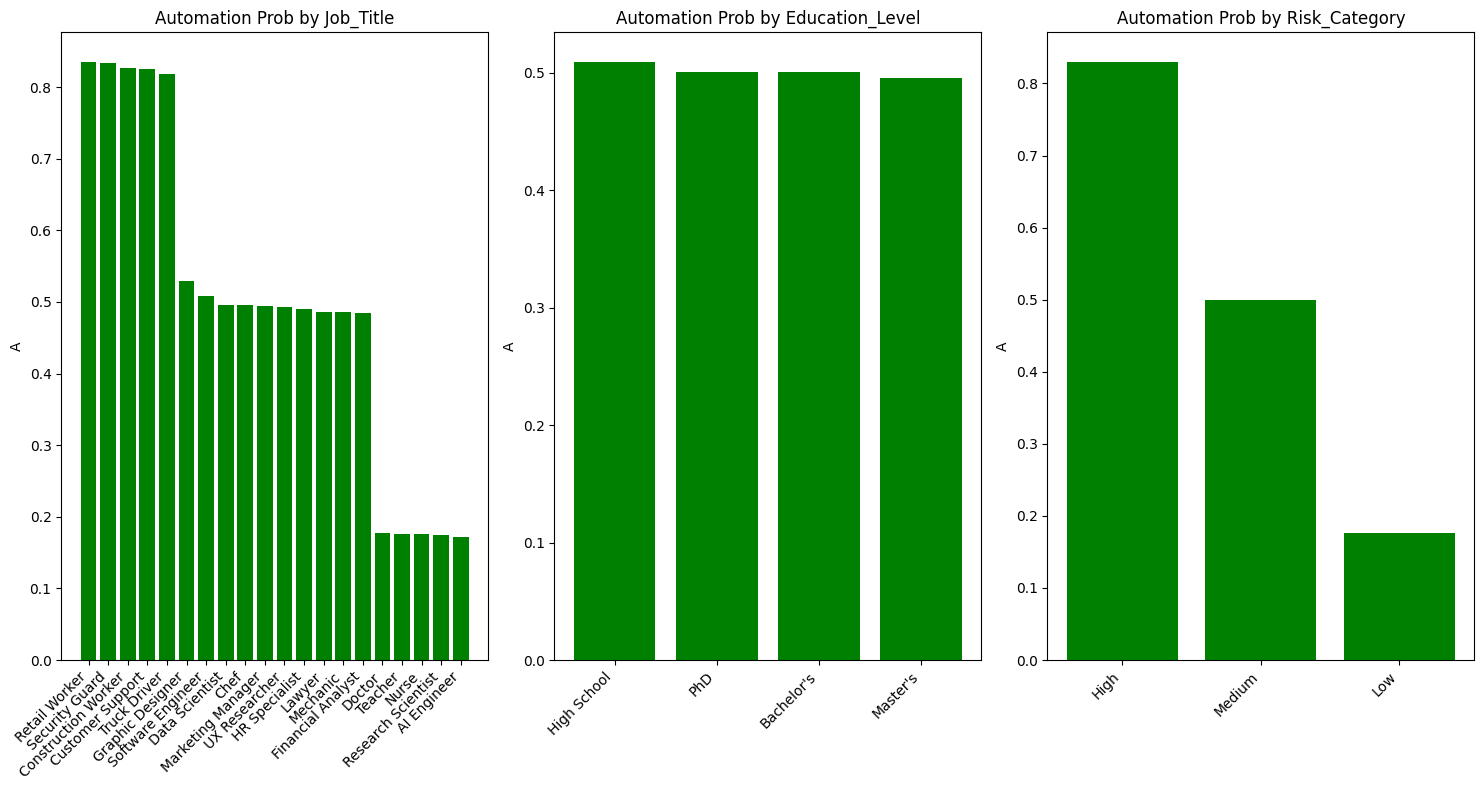

In [68]:
# AI impact by categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols[:3]):
    auto_prob = df.groupby(col)['Automation_Probability_2030'].mean().sort_values(ascending=False)
    axes[idx].bar(range(len(auto_prob)), auto_prob.values, color ='green')
    axes[idx].set_title(f'Automation Prob by {col}')
    axes[idx].set_xticks(range(len(auto_prob)))
    axes[idx].set_xticklabels(auto_prob.index, rotation=45, ha='right')
    axes[idx].set_ylabel('A')

plt.tight_layout()
plt.show()

In [69]:
num_cols = numerical_cols.columns.tolist()
num_cols

['Average_Salary',
 'Years_Experience',
 'AI_Exposure_Index',
 'Tech_Growth_Factor',
 'Automation_Probability_2030',
 'Skill_1',
 'Skill_2',
 'Skill_3',
 'Skill_4',
 'Skill_5',
 'Skill_6',
 'Skill_7',
 'Skill_8',
 'Skill_9',
 'Skill_10']

In [70]:
ai_df['Years_Experience'].value_counts().sort_values(ascending=False)

Years_Experience
21    121
29    115
27    114
11    114
16    111
3     109
28    107
18    106
26    106
4     103
9     103
10    102
7     102
1     100
22     99
25     99
0      98
15     98
23     98
14     97
5      96
8      95
19     94
13     91
12     91
20     90
6      90
2      89
24     83
17     79
Name: count, dtype: int64

# Data Clearning Tasks
1. Check for null values
2. Apply the Pandas dropna() method to the whole dataframe

In [71]:
ai_df.isnull().sum() #checking total amount of missing values - all zeros

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

In [72]:
ai_df.dropna() #dropping any features with 'NaN' values

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Doctor,111319,6,Bachelor's,0.24,1.18,0.20,Low,0.73,0.37,0.99,0.07,0.08,0.92,0.65,0.33,0.76,0.45
2996,UX Researcher,44363,29,PhD,0.65,0.74,0.35,Medium,0.23,0.48,0.05,0.88,0.56,0.29,0.69,0.80,0.61,0.20
2997,Data Scientist,61325,23,Master's,0.64,0.94,0.39,Medium,0.28,0.62,0.73,0.21,0.96,0.01,0.70,0.29,0.48,0.57
2998,Graphic Designer,110296,7,PhD,0.95,1.23,0.46,Medium,0.21,0.18,0.14,0.22,0.55,0.68,0.31,0.55,0.34,0.70


# Finally, saving the clean data frame as a new file ready for the feature enrichment process

In [74]:
ai_df.to_csv('../Resources/AI_Impact_On_Jobs_2030_cleaned.csv', index=False)